# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives





At the end of the experiment you will be able to :

* implement convolutional neural networks using Keras

In [41]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="1000" height="450" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Keras_FashionMNIST_Walkthrough.mp4" type="video/mp4">
</video>
""")

## Dataset

### History

The original MNIST dataset contains handwritten digits. People from AI/ML or Data Science community love this dataset. They use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset they would try on. As per popular belief, If the algorithm doesn’t work on MNIST, it won’t work at all. Well, if algorithm works on MNIST, it may still fail on other datasets.


As per the original [paper](https://arxiv.org/abs/1708.07747) describing about Fashion-MNIST, It is a dataset recomposed from the product pictures of Zalando’s websites. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

There are some good reasons for the challenges faced by MNIST dataset:

* MNIST is too easy - Neural networks can achieve 99.7% on MNIST easily, and similarly, even classic ML algorithms can achieve 97%. 

* MNIST is overused - Almost everyone who has experience with deep learning has come across MNIST at least once.

* MNIST cannot represent modern CV task





### Description

The dataset choosen for this experiment is Fashion-MNIST. The dataset is made up of 28x28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images and the test set has 10,000 images. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

**Labels / Classes**

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

## Setup Steps

In [42]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id="2100121"#@param{type:"string"}

In [43]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password="5142192291"#@param{type:"string"}

In [44]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="U3W15_30_Keras_Fashion_MNIST_B" #name of the notebook

def setup():
    print ("Setup completed successfully")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Load Fashion MNIST dataset

In [64]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Here dataset is loaded and divided into train and test images and corresponding labels. MNIST comes with 70,000 data samples with 60,000 being training data and 10,000 being test data. 

In [65]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Visualize the data

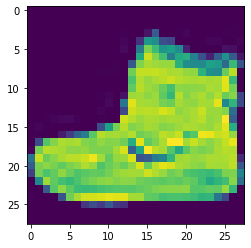

In [66]:
 # YOUR CODE HERE: To plot the first image in the dataset of train_images
 import matplotlib.pyplot as plt # Plot the first image in the dataset
plt.imshow(train_images[0])

### Data Pre-Processing


In [48]:
train_images = train_images.reshape((60000, 28, 28, 1))
#train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
#test_images = test_images.astype('float32') / 255

In [61]:
train_images.shape , train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [67]:
from keras.utils import to_categorical

# YOUR CODE HERE: To convert the train_lables and test_labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [68]:
train_labels = train_labels.reshape(60000, 10)
train_labels.shape

(60000, 10)

### Preparing the model

Initialize our CNN model by creating an instance of Sequential. The Sequential function initializes a linear stack of layers which allows to add more layers later using the Dense module.

In [69]:
# Importing the required packages
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()

Adding First Convolution Layer to CNN

*   First parameter is number of output_channels
*   Second parameter is the kernel_size
*   Third parameter is activation function. Use rectifier function, shortened as relu.
*   Final parameter is input_shape, which is the height and width of the grey scale image 

In [70]:
# First convolution layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max Pool with kernel size (2, 2)

Adding Second and Third Convolution Layer to CNN

*   First parameter is number of output_channels
*   Second parameter is the kernel_size
*   Third parameter is activation function. Use rectifier function, shortened as relu.

In [71]:
# YOUR CODE HERE: To define and add second convolutional layer with filters = 64 and kernel_size=(3,3) and activation 'relu'
# YOUR CODE HERE: to define and add a maxpool layer with pool_size=2


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pool with kernel size (2, 2)

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())

Adding Fully Connected Layer

*   First parameter is number of nodes in each layer.
*   Second parameter is activation function. Use rectifier function, shortened as relu.


In [72]:
model.add(Dense(64, activation='relu'))

Adding Output Layer

* First parameter of output layer is changed because the expected nodes at the output layer is ten nodes, here we’re dealing with a classification problem that has ten categories to classify in the fashion_mnist dataset (i.e. classifying T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)

* Change the activation function to Softmax to get the probabilities of those 10 classes. Softmax is a sigmoid function applied to an independent variable with more than two categories

In [73]:
# YOUR CODE HERE: To define and add a dense layer for 10 classes with softmax as activation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Compiling the CNN
 
* The first parameter is to get the optimal set of weights in the neural network. A very efficient one to use is adam. 
* The second parameter is the loss function. Since our classes are categorical, we use  categorical_crossentopy loss function. 
* The final argument is the criterion to evaluate the model. In this case we use the accuracy.

In [74]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### To view the model summary

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

### Training the Model

Fitting CNN to the training set

* First parameter contains train images
* Second parameter contains labels
* Epochs represents the number of times we’re going to pass our full dataset through the CNN.

In [76]:
history2 = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


ValueError: ignored

### Evaluate the model

* First parameter is predicted labels of the test images
* Second parameter is actual labels of the test labels

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

### Please answer the questions below to complete the experiment:

In [77]:
#@title State True or False: Keras does backpropagation automatically with one of the compile methods (model.compile)
Answer = "FALSE"#@param ["","TRUE", "FALSE"] 


In [78]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [80]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nn" #@param {type:"string"}


In [81]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [82]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [83]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [84]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [85]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 12325
Date of submission:  23 Dec 2020
Time of submission:  15:35:39
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
